# **SQL Assessment - Microsoft's Best Practices Checker**

Evaluate SQL Server on Azure VM for configuration best practices using [SQL best practices assessment](https://learn.microsoft.com/en-us/shows/Data-Exposed/optimally-configure-sql-server-on-azure-virtual-machines-with-sql-assessment?WT.mc_id=dataexposed-c9-niner) feature on Azure portal provided by the [SQL Assessment API](https://learn.microsoft.com/en-us/sql/sql-assessment-api/sql-assessment-api-overview).

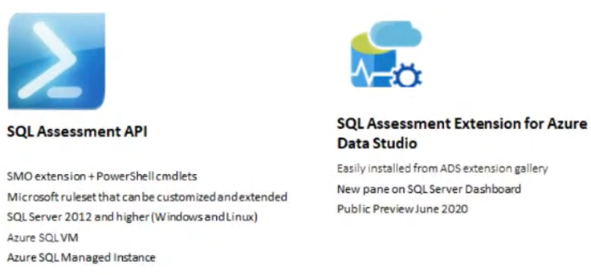

The SQL Assessment API provides a mechanism to evaluate the configuration of your SQL Server for best practices. The API is delivered with a ruleset containing best practice rules suggested by the Microsoft SQL Server team. This ruleset is enhanced with the release of new versions, but at the same time, the API is built to give a highly customizable and extensible solution. Users can tune the default rules and create their own.

The SQL Assessment API is useful when you want to make sure your SQL Server configuration is in line with recommended best practices. After an initial assessment, configuration stability can be tracked by regularly scheduled assessments.

### **Environments Supported**

- SQL Server 2012 and higher
- SQL Server on Azure Virtual Machines
- Azure SQL Database Managed Instance
- SQL on Linux-based systems
- SQL Server Assessment Extension for Azure Data Studio (ADS)
- Azure Arc-enabled SQL Server

# **Prerequisites**

To use the SQL best practices assessment feature, you must have the following prerequisites:

- Your SQL Server VM must be registered with the SQL Server IaaS extension in full mode.
- A Log Analytics workspace in the same subscription as your SQL Server VM to upload assessment results to.
- SQL Server needs to be 2012 or higher version.

<u>MS Note</u>:

- _The SQL Assessment API provides assessment on a variety of areas, but it does not go deeply into security. We recommend you use SQL Vulnerability Assessment to proactively improve your database security._
- _The SQL best practices assessment feature of the Azure portal does not support multiple named instances in an SQL server  
    _

# **DEMO**

- Default Ruleset Metrics
- In depth demo of SQL best practices assessment for SQL Server on Azure VMs
- Compliance Report via Azure Monitor Workbook

# References

- [Presentations/SQLAssessmentAPITutorialNotebook.ipynb at master · sqlworldwide/Presentations (github.com)](https://github.com/sqlworldwide/Presentations/blob/master/SQL%20Assessment%20-%20Microsoft's%20Best%20Practices%20Checker/SQLAssessmentAPITutorialNotebook.ipynb)
- [Presentations/SQL Assessment - Microsoft's Best Practices Checker at master · sqlworldwide/Presentations (github.com)](https://github.com/sqlworldwide/Presentations/tree/master/SQL%20Assessment%20-%20Microsoft's%20Best%20Practices%20Checker)
- [How to enable and run SQL best practices assessments on multiple SQL Servers on Azure VMs - Microsoft Community Hub](https://techcommunity.microsoft.com/t5/sql-server-blog/how-to-enable-and-run-sql-best-practices-assessments-on-multiple/ba-p/3567566)
- [GA: SQL best practices assessment for SQL Server on Azure VMs - Microsoft Community Hub](https://techcommunity.microsoft.com/t5/sql-server-blog/ga-sql-best-practices-assessment-for-sql-server-on-azure-vms/ba-p/3256416)
- [Best practices assessment -Arc-enabled SQL Server - Microsoft Community Hub](https://techcommunity.microsoft.com/t5/sql-server-blog/best-practices-assessment-arc-enabled-sql-server/ba-p/3715776)

# **Looking at Default Ruleset Metrics**

I loaded the default rule set to a database table from here. Let's look at some metrics about the default ruleset.

In [5]:
SELECT 
  COUNT(*) AS [Rules]
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.003

Rules
454


In [4]:
SELECT TOP 5
  *
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL

(5 rows affected)

Total execution time: 00:00:00.006

id,itemType,enabled,level,displayName,message,tags,description,helpLink,target_type,target_platform,target_machineType,target_engineEdition,target_version,target_name,threshold,limit
AutoCreateStats,definition,TRUE,Medium,'Auto-Create Statistics' option should be on,Turn on 'Auto-Create Statistics' option to improve query performance,"DefaultRuleset, Performance, Statistics, QueryOptimizer","The Query Optimizer determines whether an index is useful for a specific query by evaluating the stored statistics. If the statistics become out of date and significant changes have occurred against the underlying data, this can result in less than optimal query performance. In most cases, it's best to let SQL Server maintain the statistics. If you turn 'Auto Create Stats' and 'Auto Update Stats' off, then it is up to you to keep the statistics up-to-date somehow. Failure to do so will lead to poor query performance. Most applications should have these options ON. When the Auto Create statistics setting is ON, the Query Optimizer creates statistics on one or more columns of a table or an indexed view, as necessary, to improve query plans and query performance.",https://docs.microsoft.com/sql/relational-databases/statistics/statistics#CreateStatistics,Database,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NOT: master msdb tempdb,NULL,NULL
AutoUpdateStats,definition,TRUE,Medium,Auto-Update Statistics should be on,Turn on 'Auto-Update Statistics' option to improve query performance,"DefaultRuleset, Performance, Statistics, QueryOptimizer","The Query Optimizer determines whether an index is useful for a specific query by evaluating the stored statistics. If the statistics become out of date and significant changes have occurred against the underlying data, this can result in less than optimal query performance. In most cases, it's best to let SQL Server maintain the statistics. If you turn 'Auto Create Stats' and 'Auto Update Stats' off, then it is up to you to keep the statistics up-to-date somehow. Failure to do so will lead to poor query performance. Most applications should have these options ON. When the Auto Update Statistics setting is ON, the Query Optimizer updates statistics when they are used by a query and when they might be out-of-date. Statistics become out-of-date after insert, update, delete, or merge operations change the data distribution in the table or indexed view. The Query Optimizer determines when statistics might be out-of-date by counting the number of data modifications since the last statistics update and comparing the number of modifications to a threshold. The threshold is based on the number of rows in the table or indexed view. The Query Optimizer checks for out-of-date statistics before compiling a query and before executing a cached query plan. Before compiling a query, the Query Optimizer uses the columns, tables, and indexed views in the query predicate to determine which statistics might be out-of-date. Before executing a cached query plan, the Database Engine verifies that the query plan references up-to-date statistics. The AUTO_UPDATE_STATISTICS option applies to statistics created for indexes, single-columns in query predicates, and statistics that are created by using the CREATE STATISTICS statement. This option also applies to filtered statistics.",https://docs.microsoft.com/sql/relational-databases/statistics/statistics#UpdateStatistics,Database,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NOT: master msdb tempdb,NULL,NULL
QueryStoreOn,definition,TRUE,Low,Query Store should be active,Query Store operation mode should be 'Read Write' to keep performance analysis accurate,"DefaultRuleset, Performance, QueryStore, Statistics","The Query Store feature provides you with insight on query plan choice and performance. It simplifies performance troubleshooting by helping you quickly find performance differences caused by query plan changes. Query Store automatically captures a history

In [9]:
SELECT 
  DISTINCT target_type
FROM [TestDB].[dbo].[ruleset]
WHERE target_type IN ('Database','Server')

(2 rows affected)

Total execution time: 00:00:00.004

target_type
Database
Server


In [10]:
SELECT 
  level, 
  COUNT (*) AS [howManyPerLevel]
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL
GROUP BY [level];

(4 rows affected)

Total execution time: 00:00:00.005

level,howManyPerLevel
High,15
Information,117
Low,202
Medium,120


In [11]:
SELECT 
  target_platform, 
  COUNT (*) AS [howManyPerPlatform] 
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL
GROUP BY target_platform;

(3 rows affected)

Total execution time: 00:00:00.004

target_platform,howManyPerPlatform
NULL,36
Windows,69
Windows Linux,349


In [12]:

SELECT 
  target_engineEdition, 
  COUNT (*) AS [howManyPerEngEdition] 
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL
GROUP BY target_engineEdition;
     

(8 rows affected)

Total execution time: 00:00:00.006

target_engineEdition,howManyPerEngEdition
NULL,27
"Enterprise, ManagedInstance",1
Express,6
SqlServer,164
"SqlServer, ManagedInstance",250
Standard,3
"Standard, Enterprise, ManagedInstance",2
"Standard, Express",1


In [14]:
SELECT 
  SUBSTRING (target_version, CHARINDEX('1',target_version, 1) , 2) AS [SQLVersion], 
  COUNT(*) AS [howManyPerVerison]
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL
AND target_version IS NOT NULL
GROUP BY SUBSTRING (target_version, CHARINDEX('1',target_version, 1) , 2);

(3 rows affected)

Total execution time: 00:00:00.019

SQLVersion,howManyPerVerison
11,417
12,12
13,12


In [15]:
SELECT
  *
FROM [TestDB].[dbo].[ruleset]
WHERE id IS NOT NULL
AND id IN 
    (
      'DeprecatedFeatures', 
      'LatestCU', 
      'TempDBFilesNotSameSize',
      'DuplicateIndexes',
      'UnusedIndex',
      'WeakPassword',
      'MaxMemory',
      'PowerPlanSchemeNotRecommended',
      'LoginEqPassword',
      'PercentAutogrows'
    )
AND itemType = 'definition' ;

(9 rows affected)

Total execution time: 00:00:00.005

id,itemType,enabled,level,displayName,message,tags,description,helpLink,target_type,target_platform,target_machineType,target_engineEdition,target_version,target_name,threshold,limit
DeprecatedFeatures,definition,TRUE,Low,Deprecated or discontinued features should not be used,Use actual features for SQL Server version @{ProductVersion} instead of found deprecated features: @{DeprecatedFeature},"DefaultRuleset, Deprecated, Security, UpdateIssues, Performance",This check detects deprecated or discontinued features used on target SQL Server instances. Deprecated features may be removed in a future release of SQL Server. Discontinued features have been removed from specific versions of SQL Server.,https://docs.microsoft.com/sql/relational-databases/performance-monitor/sql-server-deprecated-features-object,Server,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NOT: master tempdb model msdb,NULL,NULL
LatestCU,definition,TRUE,Medium,SQL Server version is not supported,Update SQL Server and install service packs and cumulative updates. Current product version @{ProductVersion} of SQL Server is out of support,"DefaultRuleset, Security, UpdateIssues","The Microsoft Support Lifecycle (MSL) policy offers a minimum of 10 years of support (5 years Mainstream support and 5 years Extended support). It also provides support for 1 year after the new service pack was released, older service packs are unsupported.",https://support.microsoft.com/help/321185/how-to-determine-the-version-edition-and-update-level-of-sql-server-an,Server,Windows Linux,NULL,SqlServer,"[11.0,)",NULL,NULL,NULL
TempDBFilesNotSameSize,definition,TRUE,Medium,TempDB data files are not the same size,Make all TempDB data files the same size,"DefaultRuleset, TempDB, Performance, DBFileConfiguration",We recommend that you create all TempDB data files at the same size.,https://support.microsoft.com/kb/2154845,Server,Windows Linux,NULL,SqlServer,"[11.0,)",NULL,NULL,NULL
DuplicateIndexes,definition,TRUE,Low,Duplicate indexes,Remove duplicate indexes in table @{Table}: @{Indexes},"DefaultRuleset, Performance, Indexes",A SQL Server index is an on-disk or in-memory structure associated with a table or view that speeds retrieval of rows from the table or view. An index contains keys built from one or more columns in the table or view.,https://docs.microsoft.com/sql/relational-databases/sql-server-index-design-guide,Database,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NOT: master model msdb tempdb,NULL,NULL
WeakPassword,definition,TRUE,Medium,SQL logins have weak passwords,Set strong passwords for logins: @{PasswordData},"DefaultRuleset, Security, WeakPassword",Some SQL logins have weak passwords. Make sure that you use a strong password for each of your SQL logins to decrease vulnerabilities.,https://docs.microsoft.com/sql/relational-databases/security/strong-passwords,Server,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NULL,NULL,NULL
UnusedIndex,definition,TRUE,Medium,Unused index,Revise unused @{IndexName} index on @{TableName} table,"DefaultRuleset, Index, Performance","Unused indexes can slow down database's performance. Time of write operations is increased because of index maintenance, but index is not used anywhere.",https://docs.microsoft.com/sql/t-sql/statements/drop-index-transact-sql,Database,Windows Linux,NULL,"SqlServer, ManagedInstance","[11.0,)",NOT: master model msdb tempdb,NULL,NULL
PercentAutogrows,definition,TRUE,Low,Database files have growth ratio in percentage,"Do not use ""File Growth In Percent"" for Autogrowth setting. Affected files: @{fileName} have growth ratio set in percentage","DefaultRuleset, Performance, DBFileConfiguration, DBConfiguration","Some database files have a growth ratio set in percentage. Over time, this could lead to uncontrolled disk space allocation and extended time to perform these growths",https://docs.microsoft.com/sql/t-sql/statements/alter-database-transact-sql-file-and-filegroup-options,Database